Practica : entrenar red nbeuronal para clasifiar imagenes de numeros (28x28) 

In [1]:
import torch 

In [ ]:
## Un tensor es una manera organizada de almacenar un arreglo de datos (EJ : datos tabulares , imagenes ,audio , texto ) puede ser tanto un vector (1 dimension) como una matriz (2 dimensiones) o mas dimensiones para datos mas complejos (imagenes a color , videos )


## Ejemplo 

Arreglo_datos = [[1,2,3],[4,5,6]]
Tensor_dedatos = torch.tensor(Arreglo_datos)

print(type(Tensor_dedatos))
print(Tensor_dedatos)



In [ ]:
### Otra caracteristica es que estos datos pueden ser procesados tanto por gpu como cpu (torch.cuda.is_available())

Tensor_dedatos.device #.device para saber donde se esta almacenando

##Es posible cambiar el lugar de procesamiento con .to(cpu/cuda)
#Tensor_dedatos.to("cuda").device

In [ ]:
## Al ser un arreglo de datos un Tensor tiene atributos 
Tensor_dedatos.shape

DATA SET 

In [ ]:
## En pytorch existen 2 modulos que nos permitesn  cagar sets de datos 

torch.utils.data.DataLoader # Nos permite crear los bachs para entrenar el modelo (iterar sobre el data set )

torch.utils.data.Dataset # Nos permite leer datos que esten almacenados en X lugar 

Ahora Conociendo estos 2 conceptos (data set y tensor) podemos pasar a la practica 

In [2]:
# Primero importamos las librerias necesarias 

from torchvision import datasets # descargar el data set (este se encuentra en torch)
from torchvision.transforms import ToTensor # trabajar con tensores 
import matplotlib.pyplot as plt # hacer graficas 

dataset_28x28 = datasets.MNIST (
    
    root='./DATASET/', # donde queremos descargar 
    train=True, # descargar la totalidad de imagenes (cuando trabajamos con un data et para deep learning suele estar dividido en train and validation)
    #download=True,
    transform=ToTensor() # Transforma las imagenes a tensores para no tener que hacerlo luego 
    
)


In [3]:
dataset_28x28

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./DATASET/
    Split: Train
    StandardTransform
Transform: ToTensor()

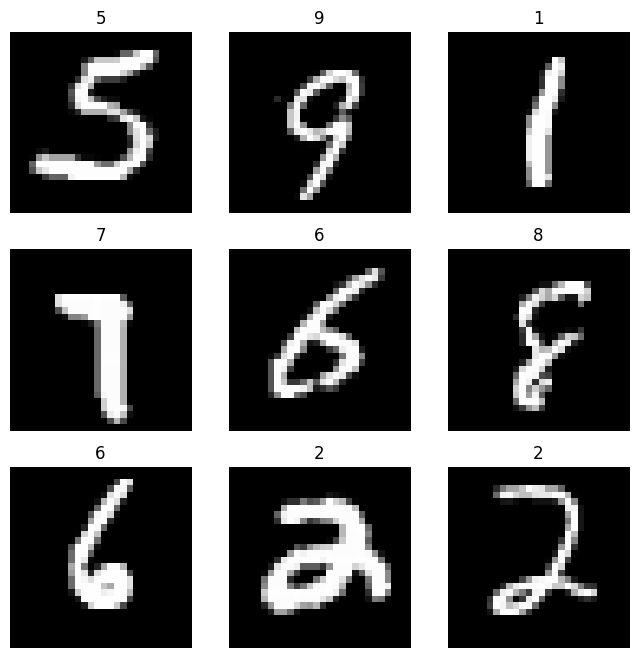

In [4]:
# observamos el algunos ejemplos del set de datos 

plot = plt.figure(figsize=(8,8))
fila , columna = 3 ,3 

for i in range(1 , columna * fila + 1 ):
    pick = torch.randint(len(dataset_28x28), size=(1,)).item()
    
    imgaen , label = dataset_28x28[pick]
    
    plot.add_subplot(fila,columna,i)
    plt.title(str(label))
    plt.axis('off')
    plt.imshow(imgaen.squeeze() , cmap='gray')
plt.show()

Como mencione antes importamos unas 60 mil imganes pero estan no estan particionadas . 
    siempre que trabajemos en una red nueronal deberemos realizar la partidicion de datos (Entrenamiento , validacion y prueba)
    Nornalmente la particion mas grande es la de entrenamiento donde 80% (segun la cantidad de datos que tengamos)
    luego tenemos la particion de validacion que se usa a la par que la de entrenamiento para validar que tan bien esta respondiendo al entrenamiento 
    y fginalmente con la de prueba probamos el modelo ya entrenado con datos que el modelo nunca vio 

In [5]:
torch.manual_seed(123) #Es recomendable fijar una semilla de aleatoridad para que al volver a correr el codigo tengamos resultados similares 

In [6]:
##Para deividir el set de entrenamiento usaremos usaremos Prueba , validacion , entrenamiento = random_split() dentro de ( pondremos el data set y los procentajes  )


entrenamiento , validacion , prueba = torch.utils.data.random_split( dataset_28x28 , [0.8 , 0.1 , 0.1] )


print(len(entrenamiento))
print(len(validacion))
print(len(prueba))





48000
6000
6000


Ahora con esto podremos empezar con la 'arquitectura' de nuestro modelo 

recordamnos que las redenes neruonales se deividen en 

capas de entrada = cantidad de variables que entren , Por ejemplo en este caso entran 28*28 pixeles de entrada = 784 variables aunque deberemos aplanarla entrada 

capas ocultas = capas donde ocurre el forward propagation

capas de salida = segun la cantidad de categorias o necesidades a predecir (10 digitos = 10 neuronas) y usamos softmax para transformar el valor de salida en una probabilidad 

## Para crear las redes neuronales en torch usamos nn.Module usando POO es decir nuestras redes neuronales van a ser subclases de nn.Module
## Nuestra red neuronal siempre tendra 2 metodos dentro de la subclase 
    INIT = el cual va a definir su arquitectura (cantidad de neuronas , capas etc) 
    forward = el cual va a definir como fluyen los valores por la red neuronal (la conexion entre las neuronas) y como se hace cada prediccion 

In [7]:

from torch import nn 

class Redneuronal(nn.Module): ## al escribir nn.module estamos diciendo que la clase redneuronal es hija de module
    ## estas 2 lineas de abajo siempre iran ya que son estandar de torch para hacer funcionar la red y inicializar el modelo
    def __init__(self):
        super().__init__() 
        #Ahora si modemos crear la arquitectura 
        
        self.aplanar = nn.Flatten() # transforma el tensor de (1x28x28) en un vector de (1 , 784)
        self.red = nn.Sequential( #Esto en torch es una forma de defininir un patron que indica una secuencia de capas aplicadas en el orden dado
            
            nn.Linear(28*28 , 15), ##Primero se define la capa de entrada + con cuantas neuronas se va a conectar (capa oculta)
            nn.ReLU(), ##Aunque arriba hayamos definido la cantidad de neuronas de la capa oculta nos falta definir su funcion de activacion
            nn.Linear(15,10), ## Decimos la capa de salida conectada con las 15 neuronas de la capa oculta 
          
        )
        
        
    def forward(self , x ): # X hace referencia al dato de entrada y la secuancia que va a tomar
        x = self.aplanar(x)
        probabilidades = self.red(x)

        return probabilidades


Ahora con la arquitectura podemos crear una instacian de la clase y moverla a la gpu / cpu 

In [8]:
Modelo = Redneuronal().to('cuda')
Modelo

Redneuronal(
  (aplanar): Flatten(start_dim=1, end_dim=-1)
  (red): Sequential(
    (0): Linear(in_features=784, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=10, bias=True)
  )
)

En caso de querer saber la cantidad de pramatros para un modelo podemos uar el metodo parameters()

In [9]:
Parametros = sum(p.numel() for p in Modelo.parameters()) #p.numel() accede a la cantidad de perametros por capa si itera y se suma
print(Parametros)

11935


Con el modelo ya listos podemos pasar a entrenar al modelo pero antes dejaremos los sets de entrenamiento y validacion listos 




In [10]:
from torch.utils.data import DataLoader

# Creamos 2 data loaders uno para el entrenamiento y otro para la validacion (como dije antes estos se usan al mismo tiempo para corroborar que el entrenamiento este yendo bien)
#Shuffle mezcla los datos 

train_loader = DataLoader( 
    dataset=entrenamiento,                          
    batch_size=1000,                      
    shuffle=True                       
                          )

val_loader = DataLoader(
    dataset=validacion,
    batch_size=1000,
    shuffle=True  
)

Ahora pdoemos preparar los hiperparametros para iniciar el entrenamiento 

In [11]:
learning_rate = 0.1 
Epochs = 6 
fun_perdida = nn.CrossEntropyLoss()
optimizador = torch.optim.SGD(Modelo.parameters() , lr = learning_rate)

Y ahora a entrenar 

In [12]:
def entrenamiento_loop(data_loader, modelo, fun_perdida, optimizador): 
    train_size = len(data_loader.dataset)
    nlotes = len(data_loader)
    modelo.train()
    
    perdida, accuracy = 0, 0
    
    for batch_idx, (x, y) in enumerate(data_loader):
        x, y = x.to("cuda"), y.to('cuda')
        # forward
        probabilidad = modelo(x)
        # backward
        loss = fun_perdida(probabilidad, y)
        loss.backward()
        optimizador.step()
        optimizador.zero_grad()
    
        perdida += loss.item()
        accuracy += (probabilidad.argmax(1) == y).type(torch.float).sum().item()
        
        # Corrección: mostrar progreso cada 10 lotes
        if batch_idx % 10 == 0: 
            current_loss = loss.item()
            processed_samples = (batch_idx + 1) * len(x)
            print(f'\tPerdida: {current_loss:>7f} [{processed_samples:>5d}/{train_size:>5d}]')
    
    perdida /= nlotes
    accuracy /= train_size
    print(f'\t Exactitud/perdida promedio:')
    print(f'\t\t entrenamiento: {(100*accuracy):>0.2f}% / {perdida:>8f}')  # Aumentar precisión

In [13]:
def val_loop(data_loader, modelo, fun_perdida): 
    val_size = len(data_loader.dataset)
    nlotes = len(data_loader)
    
    modelo.eval()
    
    perdida_val, accuracy = 0, 0
    
    with torch.no_grad():
        for X, y in data_loader: 
            X, y = X.to('cuda'), y.to('cuda')
            
            probabilidad = modelo(X)
            
            perdida_val += fun_perdida(probabilidad, y).item()
            accuracy += (probabilidad.argmax(1) == y).type(torch.float).sum().item()
            
    perdida_val /= nlotes
    accuracy /= val_size
    
    print(f'\t\tValidacion: {(100*accuracy):>0.2f}% / {perdida_val:>8f} \n')

In [14]:
for i in range(Epochs):
    print(f'Epoca = {i+1} de {Epochs}')
    
    entrenamiento_loop(train_loader, Modelo, fun_perdida, optimizador)
    
    val_loop(val_loader, Modelo, fun_perdida)
    
print('listo')

Epoca = 1 de 6
	Perdida: 2.315101 [ 1000/48000]
	Perdida: 2.178035 [11000/48000]
	Perdida: 1.944534 [21000/48000]
	Perdida: 1.751943 [31000/48000]
	Perdida: 1.536522 [41000/48000]
	 Exactitud/perdida promedio:
		 entrenamiento: 44.59% / 1.878872
		Validacion: 69.90% / 1.357099 

Epoca = 2 de 6
	Perdida: 1.336405 [ 1000/48000]
	Perdida: 1.130671 [11000/48000]
	Perdida: 0.971702 [21000/48000]
	Perdida: 0.836085 [31000/48000]
	Perdida: 0.742978 [41000/48000]
	 Exactitud/perdida promedio:
		 entrenamiento: 79.34% / 0.950745
		Validacion: 83.03% / 0.709038 

Epoca = 3 de 6
	Perdida: 0.700548 [ 1000/48000]
	Perdida: 0.644550 [11000/48000]
	Perdida: 0.594312 [21000/48000]
	Perdida: 0.578638 [31000/48000]
	Perdida: 0.542280 [41000/48000]
	 Exactitud/perdida promedio:
		 entrenamiento: 85.21% / 0.595464
		Validacion: 86.03% / 0.539305 

Epoca = 4 de 6
	Perdida: 0.511359 [ 1000/48000]
	Perdida: 0.498475 [11000/48000]
	Perdida: 0.535793 [21000/48000]
	Perdida: 0.442737 [31000/48000]
	Perdida: 0.4

In [45]:
def predecir(model, img , lbl):
    # Mover a CUDA para la predicción
    img_cuda = img.to('cuda')
    
    # Generar predicción
    logits = model(img_cuda)
    y_pred = logits.argmax(1).item()

    # Mostrar imagen original y categoría predicha
    # Mover de vuelta a CPU para visualización
    plt.imshow(img.squeeze().cpu(), cmap="gray")
    plt.title(f'Categoría predicha: {y_pred}  , categoria real {lbl}')
    

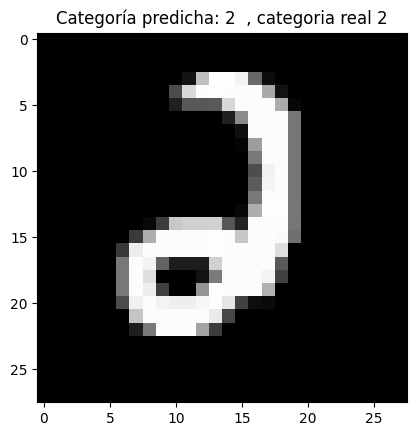

In [54]:
# Tomar una imagen del set de prueba
img, lbl = prueba[torch.randint(len(prueba), size=(1,)).item()]




# Y generar la predicción
predecir(Modelo, img , lbl)